# Taking a Look at MAESTRO Data with Chromagen

The MAESTRO dataset includes WAV/MIDI file pairs of piano compositions, and metadata in the form of .csv and .json files. My goal is to use the Chromagen module for an exploratory k-means clustering analysis of a set of WAV files. I'll ignore the MIDI files in this demo, and take the output of Chromagen.chromaweights() as our feature vector for each file.

In [145]:
import numpy as np #for linear algebra
import pandas as pd #for nice databases
from scipy.io.wavfile import read as wavread #we can read wavfiles this way
import zipfile as z #to get to the dataset
import chromagen as cg
import matplotlib.pyplot as plt

In [146]:
#since the dataset .zip has more than one file in it, we can't create a dataframe directly from the zip
file = z.ZipFile("C:/Users/jreif/Documents/Datasets/maestro-v1.0.0.zip")
#extracted just the .csv holding our metadata
file.extract("maestro-v1.0.0/maestro-v1.0.0.csv", path = "C:/Users/jreif/Documents/Datasets")
#now create a pandas dataframe using the csv
df = pd.read_csv("C:/Users/jreif/Documents/Datasets/maestro-v1.0.0/maestro-v1.0.0.csv")

In [147]:
##let's take a look at the metadata
df.head()

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
0,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471
2,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588
3,Alexander Scriabin,"3 Etudes, Op. 65",test,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508
4,Alexander Scriabin,"5 Preludes, Op.15",train,2009,2009/MIDI-Unprocessed_07_R1_2009_04-05_ORIG_MI...,2009/MIDI-Unprocessed_07_R1_2009_04-05_ORIG_MI...,400.557826


It would take some time to extract all of these files, and we don't need a huge dataset for our basic exploration. Let's take a subset of the 954 WAV files listed as "training" files to narrow the field a bit. I'll choose only the WAV files whose corresponding MIDI file is between 100 and 200 seconds.

In [148]:
df.query('split == "train" and 60<duration<300', inplace = True)

In [149]:
df

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
8,Alexander Scriabin,"Etude Op. 8, No. 13",train,2009,2009/MIDI-Unprocessed_02_R1_2009_03-06_ORIG_MI...,2009/MIDI-Unprocessed_02_R1_2009_03-06_ORIG_MI...,167.085837
9,Alexander Scriabin,"Etude in D-flat Major, Op. 8 No. 10",train,2011,2011/MIDI-Unprocessed_15_R1_2011_MID--AUDIO_R1...,2011/MIDI-Unprocessed_15_R1_2011_MID--AUDIO_R1...,102.007110
30,Antonio Soler,Sonata No. 10 in B Minor,train,2009,2009/MIDI-Unprocessed_09_R1_2009_01-04_ORIG_MI...,2009/MIDI-Unprocessed_09_R1_2009_01-04_ORIG_MI...,232.765526
34,Claude Debussy,"""Les collines d'Anacapri"" from Preludes, Book I",train,2008,2008/MIDI-Unprocessed_07_R3_2008_01-05_ORIG_MI...,2008/MIDI-Unprocessed_07_R3_2008_01-05_ORIG_MI...,166.495560
35,Claude Debussy,"""Voiles"" from Preludes, Book I",train,2008,2008/MIDI-Unprocessed_07_R3_2008_01-05_ORIG_MI...,2008/MIDI-Unprocessed_07_R3_2008_01-05_ORIG_MI...,212.295461
...,...,...,...,...,...,...,...
1170,Wolfgang Amadeus Mozart,"Sonata in D Major, K. 576, II - Adagio",train,2013,2013/ORIG-MIDI_01_7_7_13_Group__MID--AUDIO_12_...,2013/ORIG-MIDI_01_7_7_13_Group__MID--AUDIO_12_...,285.362962
1178,Wolfgang Amadeus Mozart,"Sonata in F Major, K. 280, 1st mov.",train,2013,2013/ORIG-MIDI_03_7_6_13_Group__MID--AUDIO_09_...,2013/ORIG-MIDI_03_7_6_13_Group__MID--AUDIO_09_...,192.605310
1179,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",train,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,245.315516
1180,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",train,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,241.470442


In [122]:
#extract the files we care about one by one
counter = 0
filecount = df.shape[0]
for index, row in df.iterrows():
    filepath = row['audio_filename']
    file.extract("maestro-v1.0.0/" + filepath, path = "C:/Users/jreif/Documents/Datasets/")
    counter+=1
    print("{0:3d} out of {1:3d} files extracted".format(counter, filecount), end="\r")

In [123]:
#we'll populate a dataframe with the fractions of the file during which each note is played during each song

X = pd.DataFrame(index = df.index, columns = ["A","A#","B","C","C#","D","D#","E","F","F#","G","G#"])
counter = 0
filecount = df.shape[0]
for ind, row in df.iterrows():
    filepath = row['audio_filename']
    rate, data = wavread("C:/Users/jreif/Documents/Datasets/maestro-v1.0.0/" + filepath)
    data = np.average(data, axis = 1)
    
    #Generate frequency data via short-time fourier transform
    f, t, c = cg.stft(data,10000,rate, windowtype = "Hann") 
    #get the chromagram for the song
    chrm = cg.chromagram(F_arr = f, Chi = c)
    #from the chromagram, get each chroma's weight
    cw = cg.chromaweights(chrm)
    #place the information at the correct row in X
    X.loc[ind] = cw
    counter+=1
    print("{0:3d} out of {1:3d} files analyzed".format(counter, filecount), end="\r")
X


,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
8,0.0803437,0.063793,0.0768133,0.0732304,0.116024,0.0625009,0.0861044,0.0910987,0.0751045,0.0857017,0.0626328,0.126653
9,0.0689926,0.0672908,0.0646549,0.091151,0.118409,0.0580891,0.0738329,0.0675813,0.122189,0.095352,0.0630416,0.109416
30,0.0952574,0.0587071,0.0935463,0.0647665,0.11043,0.0993018,0.0603295,0.0968256,0.0718726,0.104416,0.0617803,0.0827667
34,0.0519003,0.0806738,0.105082,0.0500887,0.115675,0.051471,0.110022,0.0811642,0.0613269,0.13904,0.0432982,0.110259
35,0.0397508,0.109558,0.0438205,0.110506,0.0672636,0.0985698,0.0659089,0.0803254,0.10931,0.0944818,0.0451632,0.135342
...,...,...,...,...,...,...,...,...,...,...,...,...
1170,0.11744,0.0512777,0.0909901,0.0550363,0.11437,0.0898011,0.0567828,0.103286,0.0772715,0.0891575,0.0593491,0.0952377
1178,0.10563,0.0759637,0.0659519,0.0959414,0.0631783,0.102137,0.0515515,0.100383,0.119167,0.0547847,0.109076,0.0562353
1179,0.0997888,0.0687078,0.0679415,0.0981359,0.0547809,0.112444,0.058428,0.107915,0.125205,0.0557888,0.089107,0.0617568
1180,0.0445666,0.0742648,0.0621269,0.0931137,0.0886776,0.069291,0.0994612,0.0633331,0.142848,0.0556203,0.0865314,0.120165


In [150]:
def initialize(k):
    #initialize the centroids
    centroids = {
        i+1: np.random.rand(12)
    for i in range(k)
    }
    #This second loop will ensure each centroid is within our constraints (sum of coordinates must be 1)
    for i in range(k):
        centroids[i+1] = centroids[i+1]/np.sum(centroids[i+1])   
        
        
    return centroids

Now we want to assign each entry to a cluster. We need to calculate the distance from each cluster, and assign the entry to the cluster with the smallest distance.

In [151]:
note_names = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
def assign_clusters(centroids,X):
    temp = X.copy()
    for i in centroids.keys():
        #calculate distance
        temp["Distance from {}".format(i)] = np.sqrt(((temp[note_names]-centroids[i]).pow(2)).sum(axis = 1))
    distances = ["Distance from {}".format(i) for i in centroids.keys()]
    
    #quick way to use our pre-existing distance columns to assign clusters as a numeric column
    assignments = pd.to_numeric((temp[distances].idxmin(axis = 1)).str.lstrip("Distance from "))
    temp["Assigned Cluster"] = assignments
    return temp

Then, we'll need to update the centroids to the mean position of each cluster. This will be the mean along each "note" axis independently.

In [152]:
def update_centroids(centroids,X):
    for i in range(len(centroids)):
        #filter for entries assigned to this cluster
        temp = X[X["Assigned Cluster"]==i+1]
        number_of_entries = len(temp.index)
        if(number_of_entries>0):
            #now take an average of all the coordinates for that cluster
            sum_dist = temp[note_names].sum(axis = 0)
            centroids[i+1] = np.array(sum_dist/number_of_entries)
    return centroids

K-means clustering is a good algorithm, but only if we have a good idea of how many clusters are present in our data. To estimate this, I'll use what's referred to as the elbow method. I'll vary K and learn the model each time, and after learning, I'll compute the sum of squared distances from the centroid for each cluster. Optimal K-value is the K at which the sum of squared distances stops dropping dramatically, the "elbow" of the curve.

We have a pretty small number of data points, so we don't want to vary K too high. I'll limit it to 12, which will account for all the major keys, though this reasoning is just based off of a hunch.

In [127]:
def ssd(centroids, X):
    squared_distances = np.zeros(len(centroids))
    for i in range(len(centroids)):
        temp = X[X["Assigned Cluster"]==i+1]
        number_of_entries = len(temp.index)
        squared_distances[i] = temp["Distance from {}".format(i+1)].pow(2).sum()
    return np.sum(squared_distances)    
        

In [130]:
SSD = np.empty(11)

for i in np.linspace(2,12,11, dtype = np.int):
    temp = X.copy()
    centroids = initialize(i)
    temp = assign_clusters(centroids, temp)
    centroids = update_centroids(centroids, temp)
    for j in range(100):
        temp = assign_clusters(centroids, temp)
        centroids = update_centroids(centroids,temp)
        print("{0:3d} clusters, {1:3d}\'th iteration".format(i, j+1), end="\r")
    SSD[i-2] = ssd(centroids, temp)
    temp.head()

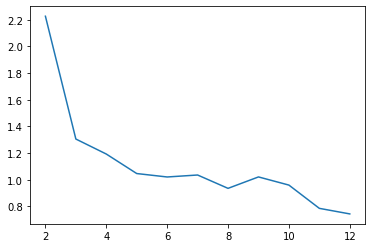

[2.22643548 1.30552228 1.19305037 1.04673792 1.0209676  1.03576197
 0.93566367 1.02134162 0.96016214 0.78563863 0.74393886]


In [131]:
plt.plot(np.linspace(2,12,11),SSD)
plt.show()
print(SSD)

It looks like our model reaches an elbow at 4 or 5 clusters. We'll choose 4.

In [140]:
centroids = initialize(4)
temp = assign_clusters(centroids, X)
centroids = update_centroids(centroids, temp)
temp = assign_clusters(centroids, temp)
for j in range(100):
    centroids = update_centroids(centroids,temp)
    temp = assign_clusters(centroids, temp)
distances = ['Distance from {}'.format(i) for i in centroids.keys()]
for i in distances:
    del temp[i]
temp.head()

,A,A#,B,C,C#,D,D#,E,F,F#,G,G#,Assigned Cluster
8,0.0803437,0.063793,0.0768133,0.0732304,0.116024,0.0625009,0.0861044,0.0910987,0.0751045,0.0857017,0.0626328,0.126653,4
9,0.0689926,0.0672908,0.0646549,0.091151,0.118409,0.0580891,0.0738329,0.0675813,0.122189,0.095352,0.0630416,0.109416,4
30,0.0952574,0.0587071,0.0935463,0.0647665,0.11043,0.0993018,0.0603295,0.0968256,0.0718726,0.104416,0.0617803,0.0827667,3
34,0.0519003,0.0806738,0.105082,0.0500887,0.115675,0.051471,0.110022,0.0811642,0.0613269,0.13904,0.0432982,0.110259,4
35,0.0397508,0.109558,0.0438205,0.110506,0.0672636,0.0985698,0.0659089,0.0803254,0.10931,0.0944818,0.0451632,0.135342,4


In [154]:
#merge on common indices
final_df = pd.merge(df, temp, left_index = True, right_index = True)
final_df.head()

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration,A,A#,B,C,C#,D,D#,E,F,F#,G,G#,Assigned Cluster
8,Alexander Scriabin,"Etude Op. 8, No. 13",train,2009,2009/MIDI-Unprocessed_02_R1_2009_03-06_ORIG_MI...,2009/MIDI-Unprocessed_02_R1_2009_03-06_ORIG_MI...,167.085837,0.0803437,0.063793,0.0768133,0.0732304,0.116024,0.0625009,0.0861044,0.0910987,0.0751045,0.0857017,0.0626328,0.126653,4
9,Alexander Scriabin,"Etude in D-flat Major, Op. 8 No. 10",train,2011,2011/MIDI-Unprocessed_15_R1_2011_MID--AUDIO_R1...,2011/MIDI-Unprocessed_15_R1_2011_MID--AUDIO_R1...,102.007110,0.0689926,0.0672908,0.0646549,0.091151,0.118409,0.0580891,0.0738329,0.0675813,0.122189,0.095352,0.0630416,0.109416,4
30,Antonio Soler,Sonata No. 10 in B Minor,train,2009,2009/MIDI-Unprocessed_09_R1_2009_01-04_ORIG_MI...,2009/MIDI-Unprocessed_09_R1_2009_01-04_ORIG_MI...,232.765526,0.0952574,0.0587071,0.0935463,0.0647665,0.11043,0.0993018,0.0603295,0.0968256,0.0718726,0.104416,0.0617803,0.0827667,3
34,Claude Debussy,"""Les collines d'Anacapri"" from Preludes, Book I",train,2008,2008/MIDI-Unprocessed_07_R3_2008_01-05_ORIG_MI...,2008/MIDI-Unprocessed_07_R3_2008_01-05_ORIG_MI...,166.495560,0.0519003,0.0806738,0.105082,0.0500887,0.115675,0.051471,0.110022,0.0811642,0.0613269,0.13904,0.0432982,0.110259,4
35,Claude Debussy,"""Voiles"" from Preludes, Book I",train,2008,2008/MIDI-Unprocessed_07_R3_2008_01-05_ORIG_MI...,2008/MIDI-Unprocessed_07_R3_2008_01-05_ORIG_MI...,212.295461,0.0397508,0.109558,0.0438205,0.110506,0.0672636,0.0985698,0.0659089,0.0803254,0.10931,0.0944818,0.0451632,0.135342,4


# Licensing

The MAESTRO dataset (v1.0.0) is made available by Google LLC under a [Creative Commons Attribution Non-Commercial Share-Alike 4.0 (CC BY-NC-SA 4.0) license](https://creativecommons.org/licenses/by-nc-sa/4.0/), and all new analysis of that unaltered data done in this notebook uses the same license. 

# Data Sources

The [MAESTRO v1.0.0 dataset](https://magenta.tensorflow.org/datasets/maestro#v100) used here was introduced in the following work:

Curtis Hawthorne, Andriy Stasyuk, Adam Roberts, Ian Simon, Cheng-Zhi Anna Huang,
  Sander Dieleman, Erich Elsen, Jesse Engel, and Douglas Eck. "Enabling
  Factorized Piano Music Modeling and Generation with the MAESTRO Dataset."
  In International Conference on Learning Representations, 2019.